In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [19]:
# !pip install scikit-learn

In [ ]:
import os
# cd /mnt/s/ChestDataset


# Define path to the main data folder
data_folder_path = r"satellite/data"

# List and print the directories inside the data folder
try:
    directories = [f for f in os.listdir(data_folder_path) if os.path.isdir(os.path.join(data_folder_path, f))]
    print(f"Directories inside '{data_folder_path}':")
    for directory in directories:
        print(directory)
except FileNotFoundError as e:
    print(f"Error: {e}")


Directories inside '/mnt/s':
$RECYCLE.BIN
alpha
automate
backup ubuntu
C
C++
ChestDataset
collections
COURSES
DLVS
errors
found.000
grass
java
java alpha
Kanetkar Y. Let Us Python Solutions. Learn by Doing-the Python Learning 5ed 2022
kmit c
Lab
movies
msdownld.tmp
notebooks_v1
react
runs
sathvik
System Volume Information
templates
test
uma akka
uploads
WT
[Coding Ninjas] Machine Learning and Data Science
__pycache__


In [21]:
import os

# Define paths
data_folder_path = r"satellite/data"  # Use raw string to avoid escaping backslashes
categories = ['cloudy', 'desert', 'green_area', 'water']

# Check the number of images in each category
for category in categories:
    folder_path = os.path.join(data_folder_path, category)
    
    # Check if the folder exists before trying to list its contents
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        print(f"{category}: {len(os.listdir(folder_path))} images")
    else:
        print(f"Folder for '{category}' does not exist: {folder_path}")


cloudy: 1500 images
desert: 1131 images
green_area: 1500 images
water: 1500 images


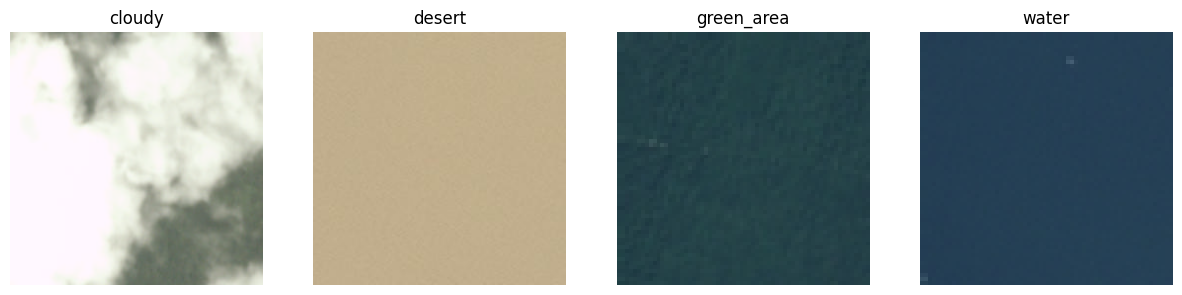

In [22]:
# Display a few images from each category
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, category in enumerate(categories):
    folder_path = os.path.join(data_folder_path, category)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')
plt.show()


In [23]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Resize images to a standard size
IMG_SIZE = (64, 64)  # For LeNet and AlexNet
data = []
labels = []

for category in categories:
    folder_path = os.path.join(data_folder_path, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

# Convert to numpy arrays and normalize
data = np.array(data, dtype='float32') / 255.0
labels = np.array(labels)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [24]:
from tensorflow.keras import Input

def create_lenet():
    model = models.Sequential()
    # Define the input shape explicitly using Input
    model.add(Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
    
    # First convolutional layer
    model.add(layers.Conv2D(6, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Add pool_size=(2, 2)

    # Second convolutional layer
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Add pool_size=(2, 2)

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(len(categories), activation='softmax'))

    return model

# Create and compile the model
lenet_model = create_lenet()
lenet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


I0000 00:00:1732084152.681916    1819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732084152.984325    1819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732084152.984471    1819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732084152.991611    1819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732084152.991749    1819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [25]:
def create_alexnet():
    model = models.Sequential()
    # First convolutional layer
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))  # Reduced pool size

    # Second convolutional layer
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))  # Adjusted pooling layer

    # Third convolutional layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fourth convolutional layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fifth convolutional layer
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))  # Adjusted pooling layer

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(len(categories), activation='softmax'))

    return model

# Create and compile the AlexNet model
alexnet_model = create_alexnet()
alexnet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/home/bunny/sathvik/tf217/tf217/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Training LeNet model
lenet_history = lenet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Training AlexNet model
alexnet_history = alexnet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10


I0000 00:00:1732084159.089169    6110 service.cc:146] XLA service 0x7ff2a0005700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732084159.089331    6110 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-20 06:29:19.168834: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-20 06:29:19.568459: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-20 06:29:21.463469: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_363', 4 bytes spill stores, 4 bytes spill loads

2024-11-20 06:29:23.044992: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory i

 11/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3284 - loss: 1.2920

I0000 00:00:1732084168.984512    6110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5664 - loss: 0.7897

2024-11-20 06:29:31.138611: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_516', 4 bytes spill stores, 4 bytes spill loads

2024-11-20 06:29:32.938625: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_589', 56 bytes spill stores, 56 bytes spill loads



113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 180ms/step - accuracy: 0.5678 - loss: 0.7869 - val_accuracy: 0.7070 - val_loss: 0.5610
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7573 - loss: 0.4817 - val_accuracy: 0.8280 - val_loss: 0.4461
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8162 - loss: 0.4228 - val_accuracy: 0.6948 - val_loss: 0.6337
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7942 - loss: 0.4677 - val_accuracy: 0.8091 - val_loss: 0.4299
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8535 - loss: 0.3429 - val_accuracy: 0.8424 - val_loss: 0.3740
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8343 - loss: 0.3713 - val_accuracy: 0.8468 - val_loss: 0.3543
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8584 - loss: 0.3473 - val_accuracy: 0.8602 - val_loss: 0.3156
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8654 - loss: 0.3291 - val_accuracy: 0.7858 - v

2024-11-20 06:30:19.319717: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_104', 16 bytes spill stores, 16 bytes spill loads

2024-11-20 06:30:19.889640: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_104', 132 bytes spill stores, 132 bytes spill loads

2024-11-20 06:30:20.258773: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 136 bytes spill stores, 136 bytes spill loads



113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.4565 - loss: 1.0079 - val_accuracy: 0.6759 - val_loss: 0.5486
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6397 - loss: 0.6504 - val_accuracy: 0.7026 - val_loss: 0.5136
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6908 - loss: 0.5485 - val_accuracy: 0.6637 - val_loss: 0.5303
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6350 - loss: 0.6380 - val_accuracy: 0.6759 - val_loss: 0.5384
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6923 - loss: 0.5189 - val_accuracy: 0.7037 - val_loss: 0.5331
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7043 - loss: 0.5291 - val_accuracy: 0.7203 - val_loss: 0.4917
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6895 - loss: 0.5228 - val_accuracy: 0.6959 - val_loss: 0.5289
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7089 - loss: 0.5165 - val_accuracy: 0.

In [27]:
# Evaluate LeNet
lenet_test_loss, lenet_test_acc = lenet_model.evaluate(X_test, y_test)
print(f"LeNet Test Accuracy: {lenet_test_acc:.4f}")

# Evaluate AlexNet
alexnet_test_loss, alexnet_test_acc = alexnet_model.evaluate(X_test, y_test)
print(f"AlexNet Test Accuracy: {alexnet_test_acc:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8691 - loss: 0.3535
LeNet Test Accuracy: 0.8731
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.7585 - loss: 0.4771
AlexNet Test Accuracy: 0.7507


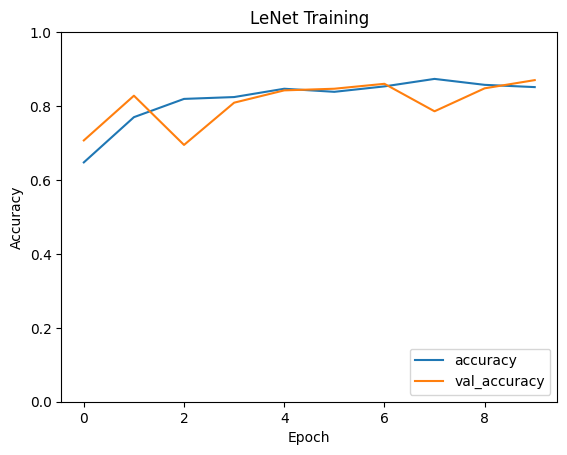

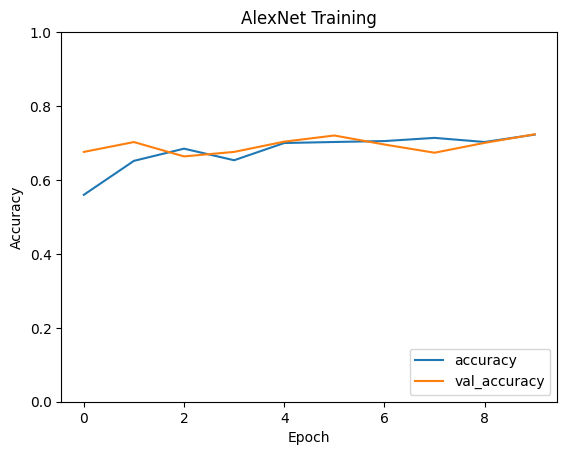

In [ ]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

plot_history(lenet_history, "LeNet Training")
plot_history(alexnet_history, "AlexNet Training")


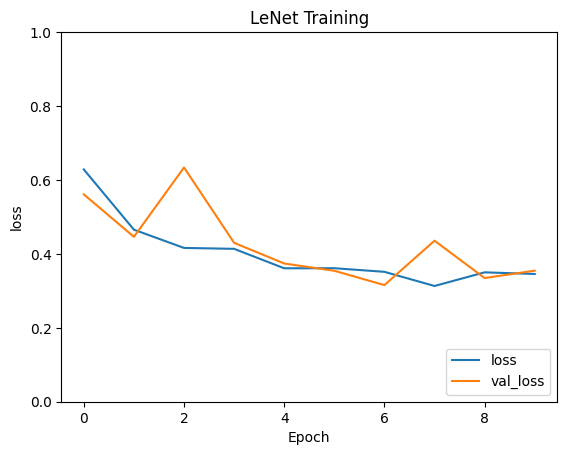

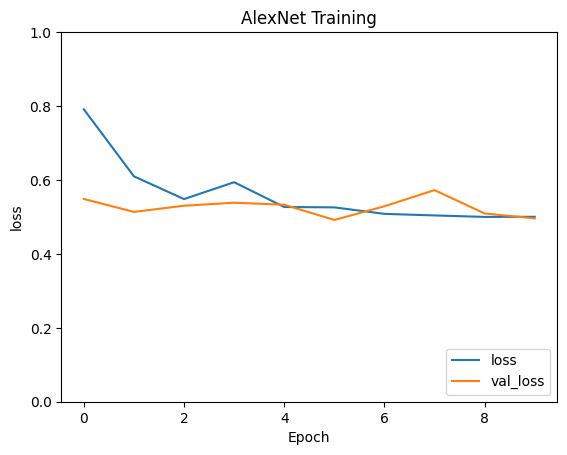

In [29]:
def plot_history(history, title):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

plot_history(lenet_history, "LeNet Training")
plot_history(alexnet_history, "AlexNet Training")
